In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
epa_data = pd.read_csv("../datasets/c4_epa_air_quality.csv", index_col = 0)
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [5]:
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [6]:
population_mean = epa_data['aqi'].mean()
population_mean

np.float64(6.757692307692308)

In [8]:
sampled_data = epa_data.sample(n=50, replace=True)
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
183,2018-01-01,District Of Columbia,District of Columbia,Washington,MCMILLAN NCore-PAMS,Carbon monoxide,Parts per million,0.200000,2
26,2018-01-01,California,Orange,La Habra,La Habra,Carbon monoxide,Parts per million,0.673684,13
144,2018-01-01,Rhode Island,Providence,East Providence,FRANCIS SCHOOL East Providence,Carbon monoxide,Parts per million,0.200000,2
72,2018-01-01,Washington,King,Seattle,SEATTLE - BEACON HILL,Carbon monoxide,Parts per million,0.273684,3
155,2018-01-01,Arizona,Maricopa,Phoenix,SOUTH PHOENIX,Carbon monoxide,Parts per million,1.394737,36
93,2018-01-01,Oklahoma,Oklahoma,Oklahoma City,Near Road,Carbon monoxide,Parts per million,0.284211,5
140,2018-01-01,Texas,Harris,Deer Park,Houston Deer Park #2,Carbon monoxide,Parts per million,0.200000,2
117,2018-01-01,California,San Diego,El Cajon,El Cajon - Lexington Elementary School,Carbon monoxide,Parts per million,0.626667,11
140,2018-01-01,Texas,Harris,Deer Park,Houston Deer Park #2,Carbon monoxide,Parts per million,0.200000,2
209,2018-01-01,Texas,Tarrant,Fort Worth,Fort Worth California Parkway North,Carbon monoxide,Parts per million,0.215789,3


In [9]:
sampled_data_mean = sampled_data["aqi"].mean()
sampled_data_mean

np.float64(7.66)

In [10]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data["aqi"].sample(n=50, replace=True).mean())

In [11]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

In [13]:
mean_sample_means = estimate_df.estimate.mean()
mean_sample_means

np.float64(6.749517999999999)

<Axes: >

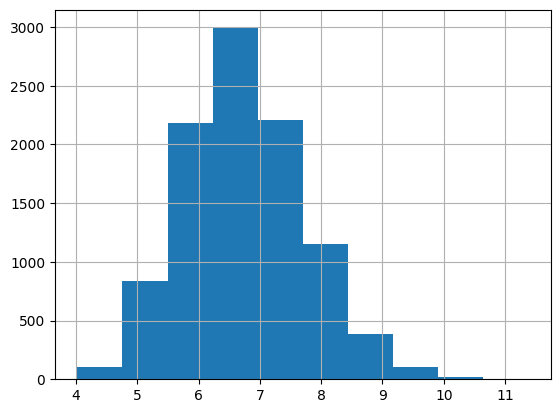

In [14]:
estimate_df['estimate'].hist()

In [16]:
#standard error
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

np.float64(1.0453434158891792)

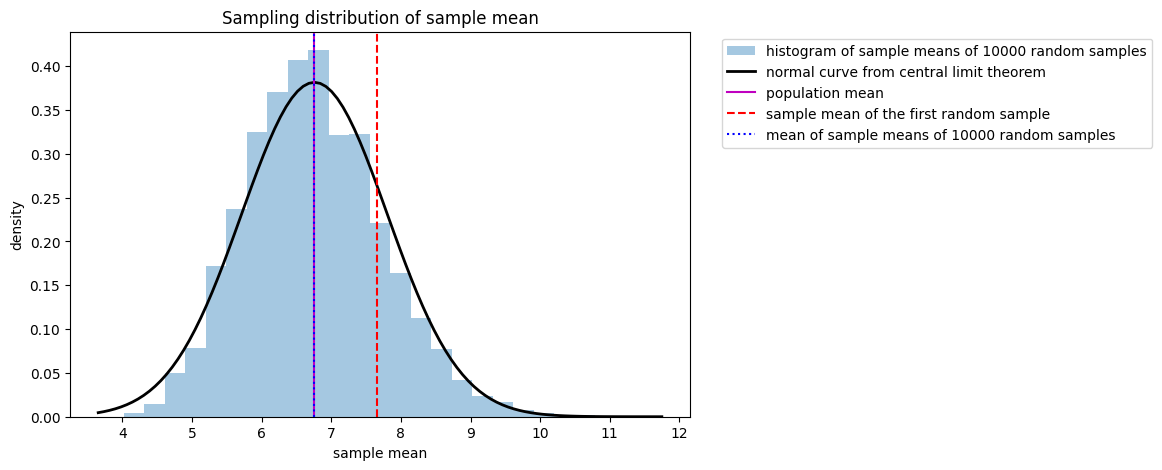

In [18]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sampled_data_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));